In [1]:
# Dependencies
import requests
import pandas as pd
import time
import scipy.stats as sts
from dateutil.relativedelta import relativedelta
from matplotlib import pyplot as plt
from datetime import datetime
from pprint import pprint
from config import news_api

In [53]:
shooting_df = pd.read_csv('Resources/shootings.csv')
shooting_df.head(10)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False,Guns
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False,Guns
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,Unarmed
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False,Other unusual objects
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,Piercing objects
5,11,Kenneth Joe Brown,2015-01-04,shot,gun,18.0,M,White,Guthrie,OK,False,attack,Not fleeing,False,Guns
6,13,Kenneth Arnold Buck,2015-01-05,shot,gun,22.0,M,Hispanic,Chandler,AZ,False,attack,Car,False,Guns
7,15,Brock Nichols,2015-01-06,shot,gun,35.0,M,White,Assaria,KS,False,attack,Not fleeing,False,Guns
8,16,Autumn Steele,2015-01-06,shot,unarmed,34.0,F,White,Burlington,IA,False,other,Not fleeing,True,Unarmed
9,17,Leslie Sapp III,2015-01-06,shot,toy weapon,47.0,M,Black,Knoxville,PA,False,attack,Not fleeing,False,Other unusual objects


In [54]:
# convert date string to datetime component
# defining consist 'scale' of months to combine with other datasets
shooting_df['clean_date'] = ''

for index, row in shooting_df.iterrows():
    shooting_df.loc[index, 'clean_date'] = datetime.strptime(row['date'], '%Y-%m-%d').strftime('%Y-%m')
shooting_df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category,clean_date
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False,Guns,2015-01
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False,Guns,2015-01
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,Unarmed,2015-01
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False,Other unusual objects,2015-01
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,Piercing objects,2015-01


In [55]:
shooting_df['race'].unique()

array(['Asian', 'White', 'Hispanic', 'Black', 'Other', 'Native'],
      dtype=object)

In [56]:
shooting_df.groupby('race')['name'].count()

race
Asian         93
Black       1298
Hispanic     902
Native        78
Other         48
White       2476
Name: name, dtype: int64

In [57]:
# month = white[index]
# white_vic = white['id']
# slope, inter, r, p, std_err = sts.linregress(month, white_vic)
# fit = slope * month + inter
# line_eq = (f"y = {round(slope,2)}x + {round(inter,2)}")

NameError: name 'white' is not defined

In [71]:
white_vic = shooting_df.loc[shooting_df['race']=='White'].groupby(['clean_date','race'])[['id']].count()
black_vic = shooting_df.loc[shooting_df['race']=='Black'].groupby(['clean_date','race'])[['id']].count()
hisp_vic = shooting_df.loc[shooting_df['race']=='Hispanic'].groupby(['clean_date','race'])[['id']].count()
asian_vic = shooting_df.loc[shooting_df['race']=='Asian'].groupby(['clean_date','race'])[['id']].count()
native_vic = shooting_df.loc[shooting_df['race']=='Native'].groupby(['clean_date','race'])[['id']].count()

wb_df = pd.merge(white_vic, black_vic, on='clean_date', how='outer', suffixes=('w','b'))
wbh_df = pd.merge(wb_df, hisp_vic, on='clean_date', how='outer')
wbha_df = pd.merge(wbh_df, asian_vic, on='clean_date', how='outer', suffixes=('','a'))
summary_df = pd.merge(wbha_df, native_vic, on='clean_date', how='outer', suffixes=('','n'))
summary_df = summary_df.fillna(0)
chart_df = summary_df.rename(columns={'idw':'white', 'idb':'black', 'id':'hispanic', 'ida':'asian', 'idn':'native'}).reset_index()
# remove latest month as data incomplete and may skew visualisation
chart_df = chart_df.iloc[:-1]
chart_df

,clean_date,white,black,hispanic,asian,native
0,2015-01,38,17,16,2.0,1.0
1,2015-02,43,20,14,0.0,0.0
2,2015-03,48,27,13,2.0,1.0
3,2015-04,40,25,14,2.0,1.0
4,2015-05,40,20,5,1.0,0.0
...,...,...,...,...,...,...
60,2020-01,38,27,13,3.0,0.0
61,2020-02,31,13,12,2.0,3.0
62,2020-03,44,14,13,1.0,0.0
63,2020-04,34,15,8,1.0,0.0


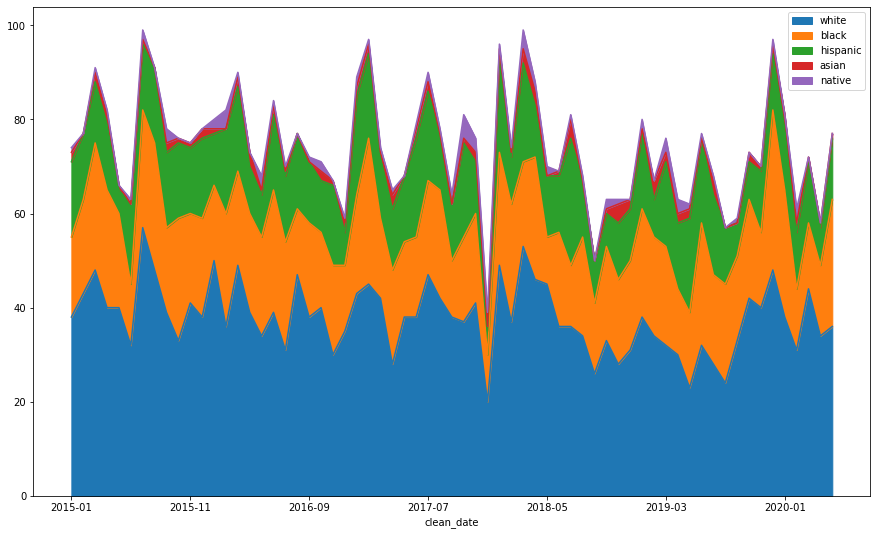

In [62]:
ax=chart_df.plot.area(x='clean_date', figsize=(15,9))

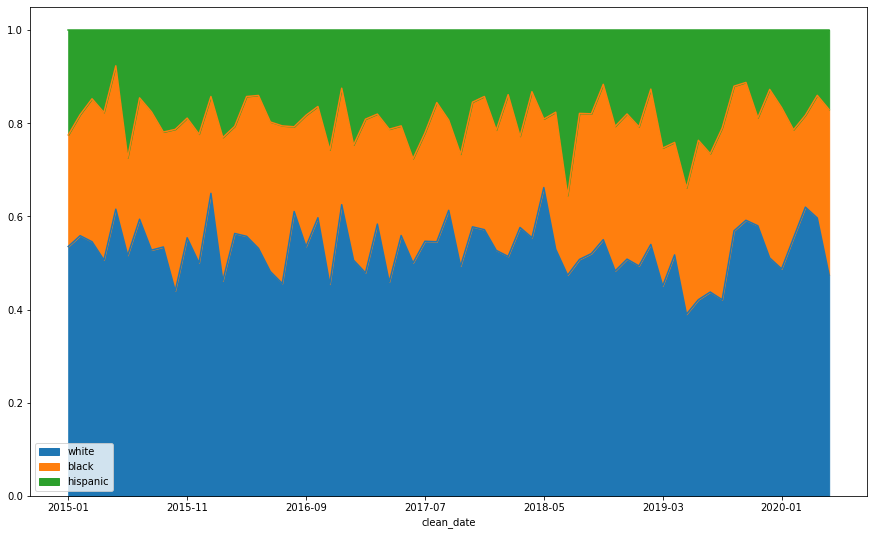

In [77]:
stacked = chart_df.iloc[:,0:4]
stacked = stacked.set_index('clean_date')
stacked = stacked.divide(stacked.sum(axis=1), axis=0)
ax = stacked.plot.area(stacked=True, figsize=(15,9))

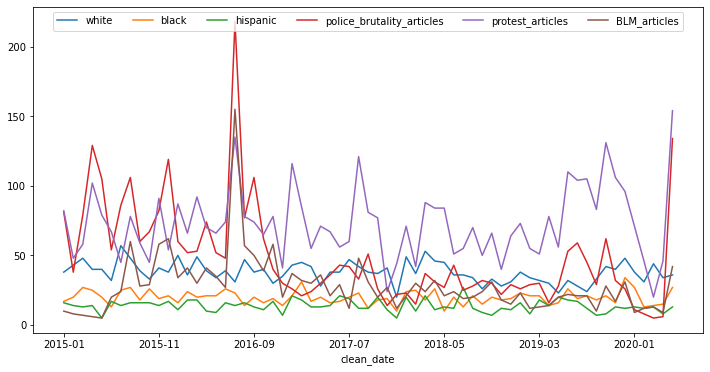

In [108]:
ax = chart_df.plot('clean_date', 'white', label='white', figsize=(12,6))
chart_df.plot('clean_date', 'black', label='black', ax=ax)
chart_df.plot('clean_date', 'hispanic', label='hispanic', ax=ax)
articles_df.plot('clean_date', 'police_brutality_articles', label='police_brutality_articles', ax=ax)
articles_df.plot('clean_date', 'protest_articles', label='protest_articles', ax=ax)
articles_df.plot('clean_date', 'blm_articles', label='BLM_articles', ax=ax)
leg = ax.legend(loc='upper center', ncol=6)

In [52]:
articles_df = chart_df.copy()
articles_df

,clean_date,white,black,hispanic,asian,native,police_shooting_articles
0,2015-01,38,17,16,2.0,1.0,5
1,2015-02,43,20,14,0.0,0.0,12
2,2015-03,48,27,13,2.0,1.0,17
3,2015-04,40,25,14,2.0,1.0,27
4,2015-05,40,20,5,1.0,0.0,14
...,...,...,...,...,...,...,...
60,2020-01,38,27,13,3.0,0.0,3
61,2020-02,31,13,12,2.0,3.0,2
62,2020-03,44,14,13,1.0,0.0,0
63,2020-04,34,15,8,1.0,0.0,1


In [49]:
articles_df['police_shooting_articles'] = ''
for index, row in articles_df.iterrows():
    query = '"police shooting"'
    date = datetime.strptime(row['clean_date'], '%Y-%m').date()
    begin_date = date.strftime('%Y%m%d')
    end_date = (date + relativedelta(months=+1)).strftime('%Y%m%d')
    
    url = f"https://api.nytimes.com/svc/search/v2/articlesearch.json?api-key={news_api}&q={query}&begin_date={begin_date}&end_date={end_date}"
    
    article = requests.get(url).json()
    # max 10 requests per minute
    time.sleep(6)
#     pprint(article)
    articles_df.loc[index, 'police_shooting_articles'] = article['response']['meta']['hits']

In [88]:
articles_df['police_brutality_articles'] = ''
for index, row in articles_df.iterrows():
    query = 'Police Brutality, Misconduct and Shootings'
    date = datetime.strptime(row['clean_date'], '%Y-%m').date()
    begin_date = date.strftime('%Y%m%d')
    end_date = (date + relativedelta(months=+1)).strftime('%Y%m%d')
    
    url = f"https://api.nytimes.com/svc/search/v2/articlesearch.json?api-key={news_api}&q={query}&begin_date={begin_date}&end_date={end_date}"
    
    article = requests.get(url).json()
    # max 10 requests per minute
    time.sleep(6)
#     pprint(article)
    articles_df.loc[index, 'police_brutality_articles'] = article['response']['meta']['hits']

In [93]:
articles_df['protest_articles'] = ''
for index, row in articles_df.iterrows():
    query = 'Demonstrations, Protests and Riots'
    date = datetime.strptime(row['clean_date'], '%Y-%m').date()
    begin_date = date.strftime('%Y%m%d')
    end_date = (date + relativedelta(months=+1)).strftime('%Y%m%d')
    
    url = f"https://api.nytimes.com/svc/search/v2/articlesearch.json?api-key={news_api}&q={query}&begin_date={begin_date}&end_date={end_date}"
    
    article = requests.get(url).json()
    # max 10 requests per minute
    time.sleep(6)
#     pprint(article)
    articles_df.loc[index, 'protest_articles'] = article['response']['meta']['hits']

In [107]:
articles_df['blm_articles'] = ''
for index, row in articles_df.iterrows():
    query = '"Black Lives Matter"'
    date = datetime.strptime(row['clean_date'], '%Y-%m').date()
    begin_date = date.strftime('%Y%m%d')
    end_date = (date + relativedelta(months=+1)).strftime('%Y%m%d')
    
    url = f"https://api.nytimes.com/svc/search/v2/articlesearch.json?api-key={news_api}&q={query}&begin_date={begin_date}&end_date={end_date}"
    
    article = requests.get(url).json()
    # max 10 requests per minute
    time.sleep(6)
#     pprint(article)
    articles_df.loc[index, 'blm_articles'] = article['response']['meta']['hits']

In [102]:
pprint(article)
# Demonstrations, Protests and Riots

{'copyright': 'Copyright (c) 2020 The New York Times Company. All Rights '
              'Reserved.',
 'response': {'docs': [{'_id': 'nyt://article/83e430e5-5c4c-515d-83ba-19c1b99cda38',
                        'abstract': 'Protesters broke windows and set fire to '
                                    'cars after the death of George Floyd in '
                                    'Minneapolis. Protests emerged in many '
                                    'U.S. cities.',
                        'byline': {'organization': None,
                                   'original': 'By Richard Fausset and Michael '
                                               'Levenson',
                                   'person': [{'firstname': 'Richard',
                                               'lastname': 'Fausset',
                                               'middlename': None,
                                               'organization': '',
                                               'quali

                                        'height': 400,
                                        'legacy': {},
                                        'rank': 0,
                                        'subType': 'threeByTwoSmallAt2X',
                                        'subtype': 'threeByTwoSmallAt2X',
                                        'type': 'image',
                                        'url': 'images/2020/06/29/world/29atlantaprotest3/29atlantaprotest3-threeByTwoSmallAt2X.jpg',
                                        'width': 600},
                                       {'caption': None,
                                        'credit': None,
                                        'crop_name': 'articleInline',
                                        'height': 127,
                                        'legacy': {},
                                        'rank': 0,
                                        'subType': 'articleInline',
                                   

                                        'crop_name': 'master315',
                                        'height': 210,
                                        'legacy': {},
                                        'rank': 0,
                                        'subType': 'master315',
                                        'subtype': 'master315',
                                        'type': 'image',
                                        'url': 'images/2020/06/01/business/01Protests-reporters/merlin_173028324_46e396ea-2651-4235-9d2c-f1f4250fc098-master315.jpg',
                                        'width': 315},
                                       {'caption': None,
                                        'credit': None,
                                        'crop_name': 'master768',
                                        'height': 512,
                                        'legacy': {},
                                        'rank': 0,
                             

                                        'rank': 0,
                                        'subType': 'videoSmall',
                                        'subtype': 'videoSmall',
                                        'type': 'image',
                                        'url': 'images/2020/06/01/business/01Protests-reporters/01Protests-reporters-videoSmall.jpg',
                                        'width': 500},
                                       {'caption': None,
                                        'credit': None,
                                        'crop_name': 'videoHpMedium',
                                        'height': 211,
                                        'legacy': {},
                                        'rank': 0,
                                        'subType': 'videoHpMedium',
                                        'subtype': 'videoHpMedium',
                                        'type': 'image',
                                     

                                       {'caption': None,
                                        'credit': None,
                                        'crop_name': 'horizontalMediumAt2X',
                                        'height': 4480,
                                        'legacy': {},
                                        'rank': 0,
                                        'subType': 'horizontalMediumAt2X',
                                        'subtype': 'horizontalMediumAt2X',
                                        'type': 'image',
                                        'url': 'images/2020/05/31/us/31minn-extremists/merlin_172982358_36ad9f84-be95-42e7-8abb-38d8af7edf8e-horizontalMediumAt2X.jpg',
                                        'width': 6720},
                                       {'caption': None,
                                        'credit': None,
                                        'crop_name': 'hpLarge',
                                        '

                                     {'major': 'N',
                                      'name': 'subject',
                                      'rank': 4,
                                      'value': 'Photography'},
                                     {'major': 'N',
                                      'name': 'subject',
                                      'rank': 5,
                                      'value': 'George Floyd Protests (2020)'},
                                     {'major': 'N',
                                      'name': 'subject',
                                      'rank': 6,
                                      'value': 'Black People'},
                                     {'major': 'N',
                                      'name': 'subject',
                                      'rank': 7,
                                      'value': 'Blacks'},
                                     {'major': 'N',
                                      'name': 'subj

                                        'height': 591,
                                        'legacy': {},
                                        'rank': 0,
                                        'subType': 'videoSixteenByNine1050',
                                        'subtype': 'videoSixteenByNine1050',
                                        'type': 'image',
                                        'url': 'images/2020/06/10/world/10unrest-photos-top/10unrest-photos-top-videoSixteenByNine1050.jpg',
                                        'width': 1050},
                                       {'caption': None,
                                        'credit': None,
                                        'crop_name': 'videoSixteenByNine480',
                                        'height': 270,
                                        'legacy': {},
                                        'rank': 0,
                                        'subType': 'videoSixteenByNine480',
     

                                        'legacy': {},
                                        'rank': 0,
                                        'subType': 'blogSmallThumb',
                                        'subtype': 'blogSmallThumb',
                                        'type': 'image',
                                        'url': 'images/2020/05/30/us/30minn-protesters-7/merlin_172983954_cad4d6d9-95c1-44ef-b940-7793a3e5d9ec-blogSmallThumb.jpg',
                                        'width': 50},
                                       {'caption': None,
                                        'credit': None,
                                        'crop_name': 'thumbLarge',
                                        'height': 150,
                                        'legacy': {},
                                        'rank': 0,
                                        'subType': 'thumbLarge',
                                        'subtype': 'thumbLarge',
            

                        'keywords': [{'major': 'N',
                                      'name': 'subject',
                                      'rank': 1,
                                      'value': 'George Floyd Protests (2020)'},
                                     {'major': 'N',
                                      'name': 'subject',
                                      'rank': 2,
                                      'value': 'Demonstrations, Protests and '
                                               'Riots'},
                                     {'major': 'N',
                                      'name': 'subject',
                                      'rank': 3,
                                      'value': 'Police Brutality, Misconduct '
                                               'and Shootings'},
                                     {'major': 'N',
                                      'name': 'subject',
                                      'rank': 4,
        

                                        'type': 'image',
                                        'url': 'images/2020/05/29/nyregion/29nyprotests1/merlin_172972773_07fb348f-7df0-4552-a73e-467aa3d573c5-videoThumb.jpg',
                                        'width': 75},
                                       {'caption': None,
                                        'credit': None,
                                        'crop_name': 'videoLarge',
                                        'height': 507,
                                        'legacy': {},
                                        'rank': 0,
                                        'subType': 'videoLarge',
                                        'subtype': 'videoLarge',
                                        'type': 'image',
                                        'url': 'images/2020/05/29/nyregion/29nyprotests1/merlin_172972773_07fb348f-7df0-4552-a73e-467aa3d573c5-videoLarge.jpg',
                                        'w

                                        'subtype': 'blog480',
                                        'type': 'image',
                                        'url': 'images/2020/06/01/nyregion/31nyprotest-briefing-looting/merlin_173071899_469801f6-daaf-41f2-8f71-cbfefbddffe9-blog480.jpg',
                                        'width': 480},
                                       {'caption': None,
                                        'credit': None,
                                        'crop_name': 'blog533',
                                        'height': 355,
                                        'legacy': {},
                                        'rank': 0,
                                        'subType': 'blog533',
                                        'subtype': 'blog533',
                                        'type': 'image',
                                        'url': 'images/2020/06/01/nyregion/31nyprotest-briefing-looting/merlin_173071899_469801f6-daaf-4

                                        'type': 'image',
                                        'url': 'images/2020/06/01/nyregion/31nyprotest-briefing-looting/31nyprotest-briefing-looting-videoSixteenByNine390.jpg',
                                        'width': 390},
                                       {'caption': None,
                                        'credit': None,
                                        'crop_name': 'videoSixteenByNine1050',
                                        'height': 591,
                                        'legacy': {},
                                        'rank': 0,
                                        'subType': 'videoSixteenByNine1050',
                                        'subtype': 'videoSixteenByNine1050',
                                        'type': 'image',
                                        'url': 'images/2020/06/01/nyregion/31nyprotest-briefing-looting/31nyprotest-briefing-looting-videoSixteenByNine1050.jpg',
  

                                        'subType': 'master315',
                                        'subtype': 'master315',
                                        'type': 'image',
                                        'url': 'images/2020/05/31/us/politics/31dc-trump-pix1/31dc-trump-pix1-master315.jpg',
                                        'width': 315},
                                       {'caption': None,
                                        'credit': None,
                                        'crop_name': 'master768',
                                        'height': 434,
                                        'legacy': {},
                                        'rank': 0,
                                        'subType': 'master768',
                                        'subtype': 'master768',
                                        'type': 'image',
                                        'url': 'images/2020/05/31/us/politics/31dc-trump-pix1/31dc-trump-pix1-

                                        'height': 84,
                                        'legacy': {},
                                        'rank': 0,
                                        'subType': 'videoSixteenByNine150',
                                        'subtype': 'videoSixteenByNine150',
                                        'type': 'image',
                                        'url': 'images/2020/05/31/us/politics/31dc-trump-pix1/31dc-trump-pix1-videoSixteenByNine150.jpg',
                                        'width': 150},
                                       {'caption': None,
                                        'credit': None,
                                        'crop_name': 'videoSixteenByNineJumbo1600',
                                        'height': 900,
                                        'legacy': {},
                                        'rank': 0,
                                        'subType': 'videoSixteenByNineJumbo1600',


In [87]:
articles_df

,clean_date,white,black,hispanic,asian,native,police_shooting_articles,police_brutality_articles
0,2015-01,38,17,16,2.0,1.0,5,0
1,2015-02,43,20,14,0.0,0.0,12,0
2,2015-03,48,27,13,2.0,1.0,17,0
3,2015-04,40,25,14,2.0,1.0,27,0
4,2015-05,40,20,5,1.0,0.0,14,0
...,...,...,...,...,...,...,...,...
60,2020-01,38,27,13,3.0,0.0,3,0
61,2020-02,31,13,12,2.0,3.0,2,0
62,2020-03,44,14,13,1.0,0.0,0,0
63,2020-04,34,15,8,1.0,0.0,1,0


In [99]:
grouped_protest = pd.read_csv('grouped_protest.csv')
grouped_protest

,clean_date,Attendees
0,2017-01,30.0
1,2017-02,924.0
2,2017-03,2860.0
3,2017-04,845.0
4,2017-05,1270.0
5,2017-06,1250.0
6,2017-07,665.0
7,2017-08,6172.0
8,2017-09,2713.0
9,2017-10,1953.0


In [106]:
query = '"Floyd, George"'
# date = datetime.strptime(row['clean_date'], '%Y-%m').date()
begin_date = '20200102'
end_date = '20201002'

url = f"https://api.nytimes.com/svc/search/v2/articlesearch.json?api-key={news_api}&q={query}&begin_date={begin_date}&end_date={end_date}"

response = requests.get(url).json()
pprint(response)

{'copyright': 'Copyright (c) 2020 The New York Times Company. All Rights '
              'Reserved.',
 'response': {'docs': [{'_id': 'nyt://article/c20a74df-af21-5ace-824c-7d5404ebc2d5',
                        'abstract': 'Congressional testimony and a new debate '
                                    'over Confederate names: This is your '
                                    'morning tip sheet.',
                        'byline': {'organization': None,
                                   'original': 'By Giovanni Russonello',
                                   'person': [{'firstname': 'Giovanni',
                                               'lastname': 'Russonello',
                                               'middlename': None,
                                               'organization': '',
                                               'qualifier': None,
                                               'rank': 1,
                                               'role': 'reported',

                                        'legacy': {},
                                        'rank': 0,
                                        'subType': 'videoSixteenByNine495',
                                        'subtype': 'videoSixteenByNine495',
                                        'type': 'image',
                                        'url': 'images/2020/04/30/us/onpolitics-capitol/onpolitics-capitol-videoSixteenByNine495-v2.jpg',
                                        'width': 495},
                                       {'caption': None,
                                        'credit': None,
                                        'crop_name': 'videoSixteenByNine390',
                                        'height': 219,
                                        'legacy': {},
                                        'rank': 0,
                                        'subType': 'videoSixteenByNine390',
                                        'subtype': 'videoSixteenBy

                                       {'caption': None,
                                        'credit': None,
                                        'crop_name': 'master495',
                                        'height': 330,
                                        'legacy': {},
                                        'rank': 0,
                                        'subType': 'master495',
                                        'subtype': 'master495',
                                        'type': 'image',
                                        'url': 'images/2020/06/04/opinion/04Ross/04Ross-master495.jpg',
                                        'width': 495},
                                       {'caption': None,
                                        'credit': None,
                                        'crop_name': 'master180',
                                        'height': 120,
                                        'legacy': {},
                             

                                     'seo': None,
                                     'sub': None},
                        'keywords': [{'major': 'N',
                                      'name': 'subject',
                                      'rank': 1,
                                      'value': 'Presidential Election of 2020'},
                                     {'major': 'N',
                                      'name': 'subject',
                                      'rank': 2,
                                      'value': 'Democratic National '
                                               'Convention'},
                                     {'major': 'N',
                                      'name': 'organizations',
                                      'rank': 3,
                                      'value': 'Democratic Party'}],
                        'lead_paragraph': 'Michelle Obama, the night’s finale, '
                                          'and Eva Longo

                                        'subType': 'videoSixteenByNine150',
                                        'subtype': 'videoSixteenByNine150',
                                        'type': 'image',
                                        'url': 'images/2020/08/18/us/speakers-dnc-promo-1597727979437/speakers-dnc-promo-1597727979437-videoSixteenByNine150.jpg',
                                        'width': 150},
                                       {'caption': None,
                                        'credit': None,
                                        'crop_name': 'videoSixteenByNineJumbo1600',
                                        'height': 901,
                                        'legacy': {},
                                        'rank': 0,
                                        'subType': 'videoSixteenByNineJumbo1600',
                                        'subtype': 'videoSixteenByNineJumbo1600',
                                        'type': 'ima

                                        'height': 400,
                                        'legacy': {},
                                        'rank': 0,
                                        'subType': 'threeByTwoSmallAt2X',
                                        'subtype': 'threeByTwoSmallAt2X',
                                        'type': 'image',
                                        'url': 'images/2020/08/28/us/28march-01altalt/28march-01altalt-threeByTwoSmallAt2X.jpg',
                                        'width': 600},
                                       {'caption': None,
                                        'credit': None,
                                        'crop_name': 'articleInline',
                                        'height': 127,
                                        'legacy': {},
                                        'rank': 0,
                                        'subType': 'articleInline',
                                        

                                        'legacy': {},
                                        'rank': 0,
                                        'subType': 'master768',
                                        'subtype': 'master768',
                                        'type': 'image',
                                        'url': 'images/2020/06/05/us/politics/05dc-factcheck/merlin_173234787_74ebcff1-9a20-4498-a194-c341c22cdbdf-master768.jpg',
                                        'width': 768},
                                       {'caption': None,
                                        'credit': None,
                                        'crop_name': 'thumbStandard',
                                        'height': 75,
                                        'legacy': {'thumbnail': 'images/2020/06/05/us/politics/05dc-factcheck/05dc-factcheck-thumbStandard.jpg',
                                                   'thumbnailheight': 75,
                                    

                                        'url': 'images/2020/06/05/us/politics/05dc-factcheck/05dc-factcheck-videoSixteenByNine150.jpg',
                                        'width': 150},
                                       {'caption': None,
                                        'credit': None,
                                        'crop_name': 'videoSixteenByNineJumbo1600',
                                        'height': 900,
                                        'legacy': {},
                                        'rank': 0,
                                        'subType': 'videoSixteenByNineJumbo1600',
                                        'subtype': 'videoSixteenByNineJumbo1600',
                                        'type': 'image',
                                        'url': 'images/2020/06/05/us/politics/05dc-factcheck/05dc-factcheck-videoSixteenByNineJumbo1600.jpg',
                                        'width': 1600},
                                 